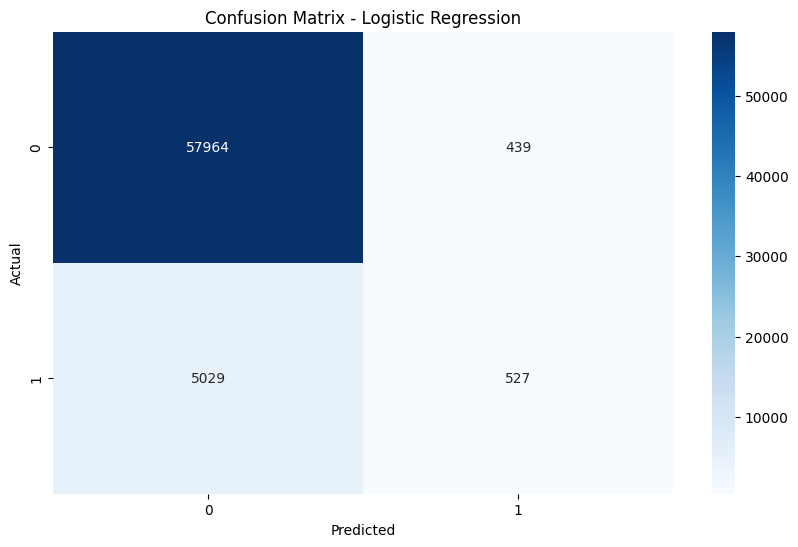

[[57964   439]
 [ 5029   527]]
              precision    recall  f1-score   support

          No       0.92      0.99      0.95     58403
         Yes       0.55      0.09      0.16      5556

    accuracy                           0.91     63959
   macro avg       0.73      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959

Enter BMI: 20
Do you smoke? (Yes/No): yes
Do you drink alcohol? (Yes/No): yes
Have you had a stroke? (Yes/No): yes
Number of days physical health was not good in the past 30 days: 29
Number of days mental health was not good in the past 30 days: 28
Do you have difficulty walking? (Yes/No): yes
Enter your sex (Male/Female): male
Enter your age category (18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80 or older): 50-54
Enter your race: white
Are you diabetic? (Yes/No): yes
Do you engage in physical activity? (Yes/No): no
General health (Poor, Fair, Good, Very good, Excellent): good
Average hours of 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/content/heart.csv'
heart_data = pd.read_csv(file_path)

# One-hot encode categorical variables
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                       'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma']
heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_columns)

# Splitting the dataset into features and target variable
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
log_reg_model.fit(X_train, y_train)

# Model Evaluation
# Make predictions with the Logistic Regression model
y_pred_lr = log_reg_model.predict(X_test)

# Generate the confusion matrix and classification report
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

# Visualize the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print confusion matrix and classification report
print(conf_matrix_lr)
print(class_report_lr)

# Function to get user input and make prediction
def get_user_input():
    user_data = {}
    user_data['BMI'] = float(input("Enter BMI: "))
    user_data['Smoking'] = input("Do you smoke? (Yes/No): ")
    user_data['AlcoholDrinking'] = input("Do you drink alcohol? (Yes/No): ")
    user_data['Stroke'] = input("Have you had a stroke? (Yes/No): ")
    user_data['PhysicalHealth'] = int(input("Number of days physical health was not good in the past 30 days: "))
    user_data['MentalHealth'] = int(input("Number of days mental health was not good in the past 30 days: "))
    user_data['DiffWalking'] = input("Do you have difficulty walking? (Yes/No): ")
    user_data['Sex'] = input("Enter your sex (Male/Female): ")
    user_data['AgeCategory'] = input("Enter your age category (18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-64, 65-69, 70-74, 75-79, 80 or older): ")
    user_data['Race'] = input("Enter your race: ")
    user_data['Diabetic'] = input("Are you diabetic? (Yes/No): ")
    user_data['PhysicalActivity'] = input("Do you engage in physical activity? (Yes/No): ")
    user_data['GenHealth'] = input("General health (Poor, Fair, Good, Very good, Excellent): ")
    user_data['SleepTime'] = int(input("Average hours of sleep per night: "))
    user_data['Asthma'] = input("Do you have asthma? (Yes/No): ")

    # Convert user input into a DataFrame
    user_df = pd.DataFrame([user_data])

    # Perform one-hot encoding on user input
    user_df_encoded = pd.get_dummies(user_df, columns=categorical_columns)

    # Reorder columns to match the encoded dataset
    user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

    return user_df_encoded

# Get user input
user_input_df = get_user_input()

# Make prediction using the Logistic Regression model
user_prediction = log_reg_model.predict(user_input_df)

# Output the prediction
print("Heart Disease Prediction (0 = No, 1 = Yes):", user_prediction[0])
